In [3]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('ticks')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

import warnings
warnings.filterwarnings('ignore')

In [4]:
df_train = pd.read_csv('dataset.csv', index_col=0)
df_test = pd.read_csv('validation_set.csv', index_col=0)

target = df_train['default payment next month']

In [5]:
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,200000,2,3,1,30,2,2,2,2,2,...,147273,149244,151973,6600,6000,5860,6000,5000,0,0
1,200000,2,4,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
2,20000,2,2,2,28,0,0,2,0,0,...,8168,6894,11424,3353,3,5101,6,6530,8103,1
3,50000,1,2,2,23,0,0,0,-1,0,...,48437,18712,19129,4175,41000,51705,700,718,700,0
4,20000,1,2,1,47,-1,-1,-1,-2,-2,...,0,0,0,780,0,0,0,0,0,0


In [6]:
df_train = df_train.astype(float)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 0 to 22499
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   22500 non-null  float64
 1   SEX                         22500 non-null  float64
 2   EDUCATION                   22500 non-null  float64
 3   MARRIAGE                    22500 non-null  float64
 4   AGE                         22500 non-null  float64
 5   PAY_0                       22500 non-null  float64
 6   PAY_2                       22500 non-null  float64
 7   PAY_3                       22500 non-null  float64
 8   PAY_4                       22500 non-null  float64
 9   PAY_5                       22500 non-null  float64
 10  PAY_6                       22500 non-null  float64
 11  BILL_AMT1                   22500 non-null  float64
 12  BILL_AMT2                   22500 non-null  float64
 13  BILL_AMT3                   225

In [8]:
df_train.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,...,22500.000000,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,167267.274667,1.602533,1.852356,1.549911,35.526000,-0.014978,-0.135200,-0.166800,-0.221333,-0.266533,...,43265.662667,40400.279733,38997.275778,5697.756489,5.944526e+03,5308.332489,4802.920444,4724.458178,5165.231067,0.221200
std,129383.700485,0.489385,0.787066,0.521673,9.231461,1.119429,1.189176,1.194886,1.166326,1.131526,...,64360.019334,60879.044012,59646.978910,17201.619690,2.214392e+04,18549.384158,15738.417203,14938.300190,17467.663795,0.415064
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-61372.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2280.000000,1760.000000,1243.750000,1000.000000,8.270000e+02,390.000000,300.000000,258.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19003.500000,18105.500000,17071.000000,2100.000000,2.006000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54562.500000,50343.750000,49355.500000,5009.000000,5.000000e+03,4510.500000,4001.500000,4000.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,527143.000000,1.000000


In [9]:
df_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
print(df_train.SEX.value_counts())
df_train.SEX = np.where(df_train.SEX == 2, 0, df_train.SEX)
print(df_train.SEX.value_counts())

2.0    13557
1.0     8943
Name: SEX, dtype: int64
0.0    13557
1.0     8943
Name: SEX, dtype: int64


In [11]:
conditions = [df_train.MARRIAGE == 3, df_train.MARRIAGE == 2]
choices = [0, 0]

print(df_train.MARRIAGE.value_counts())
df_train.MARRIAGE = np.select(conditions, choices, df_train.MARRIAGE)
print(df_train.MARRIAGE.value_counts())

2.0    11942
1.0    10281
3.0      236
0.0       41
Name: MARRIAGE, dtype: int64
0.0    12219
1.0    10281
Name: MARRIAGE, dtype: int64


In [12]:
conditions = [df_train.EDUCATION == 5, df_train.EDUCATION == 6, df_train.EDUCATION == 0]
choices = [4, 4, 4]

print(df_train.EDUCATION.value_counts())
df_train.EDUCATION = np.select(conditions, choices, df_train.EDUCATION)
print(df_train.EDUCATION.value_counts())

2.0    10546
1.0     7921
3.0     3690
5.0      205
4.0       90
6.0       35
0.0       13
Name: EDUCATION, dtype: int64
2.0    10546
1.0     7921
3.0     3690
4.0      343
Name: EDUCATION, dtype: int64


In [13]:
df_train.rename(columns={'default payment next month': 'default', 'PAY_0': 'PAY_1'}, inplace=True)

In [14]:
col_dict = {col: col.lower() for col in df_train.columns}
df_train.rename(columns=col_dict, inplace = True)
df_train.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [15]:
df_initial = df_train.copy()

In [16]:
to_bin = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

for col in to_bin:
    conditions = [df_train[col] <= 0, df_train[col] > 0]
    choices = [0, 1]
    df_train[col + '_bin'] = np.select(conditions, choices, df_train[col])

In [17]:
bin_cols = ['pay_1_bin', 'pay_2_bin', 'pay_3_bin', 'pay_4_bin', 'pay_5_bin', 'pay_6_bin']

for col in bin_cols:
    print(df_train.groupby('default')[col].value_counts(normalize=True))

default  pay_1_bin
0.0      0.0          0.853564
         1.0          0.146436
1.0      1.0          0.511151
         0.0          0.488849
Name: pay_1_bin, dtype: float64
default  pay_2_bin
0.0      0.0          0.915311
         1.0          0.084689
1.0      0.0          0.632309
         1.0          0.367691
Name: pay_2_bin, dtype: float64
default  pay_3_bin
0.0      0.0          0.914056
         1.0          0.085944
1.0      0.0          0.671087
         1.0          0.328913
Name: pay_3_bin, dtype: float64
default  pay_4_bin
0.0      0.0          0.930777
         1.0          0.069223
1.0      0.0          0.718907
         1.0          0.281093
Name: pay_4_bin, dtype: float64
default  pay_5_bin
0.0      0.0          0.943845
         1.0          0.056155
1.0      0.0          0.756279
         1.0          0.243721
Name: pay_5_bin, dtype: float64
default  pay_6_bin
0.0      0.0          0.937796
         1.0          0.062204
1.0      0.0          0.757484
         1.0 

Paycode 1 Summary


default      0.0   1.0
pay_1_bin             
0.0        14957  2433
1.0         2566  2544


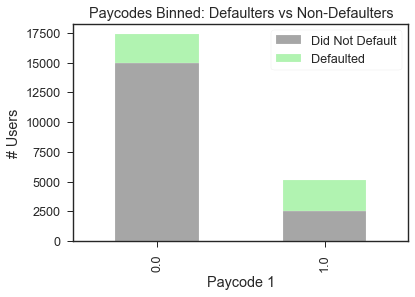

In [18]:

print('Paycode 1 Summary')

print('\n')
print(df_train.groupby(['pay_1_bin','default']).pay_1_bin.count().unstack())

# Passenger class visualization
pay1_bin = df_train.groupby(['pay_1_bin','default']).pay_1_bin.count().unstack()
p1 = pay1_bin.plot(kind = 'bar', stacked = True, 
                   title = 'Paycodes Binned: Defaulters vs Non-Defaulters', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Paycode 1')
p1.set_ylabel('# Users')
p1.legend(['Did Not Default','Defaulted'])
plt.show()

Paycode 2 Summary


default      0.0   1.0
pay_2_bin             
0.0        16039  3147
1.0         1484  1830


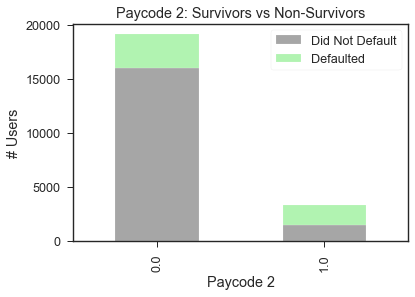

In [19]:
print('Paycode 2 Summary')

print('\n')
print(df_train.groupby(['pay_2_bin','default'])['pay_2_bin'].count().unstack())

pay2 = df_train.groupby(['pay_2_bin','default'])['pay_2_bin'].count().unstack()
p2 = pay2.plot(kind = 'bar', stacked = True, 
                   title = 'Paycode 2: Survivors vs Non-Survivors', 
                   color = ['grey','lightgreen'], alpha = .70)
p2.set_xlabel('Paycode 2')
p2.set_ylabel('# Users')
p2.legend(['Did Not Default','Defaulted'])
plt.show()

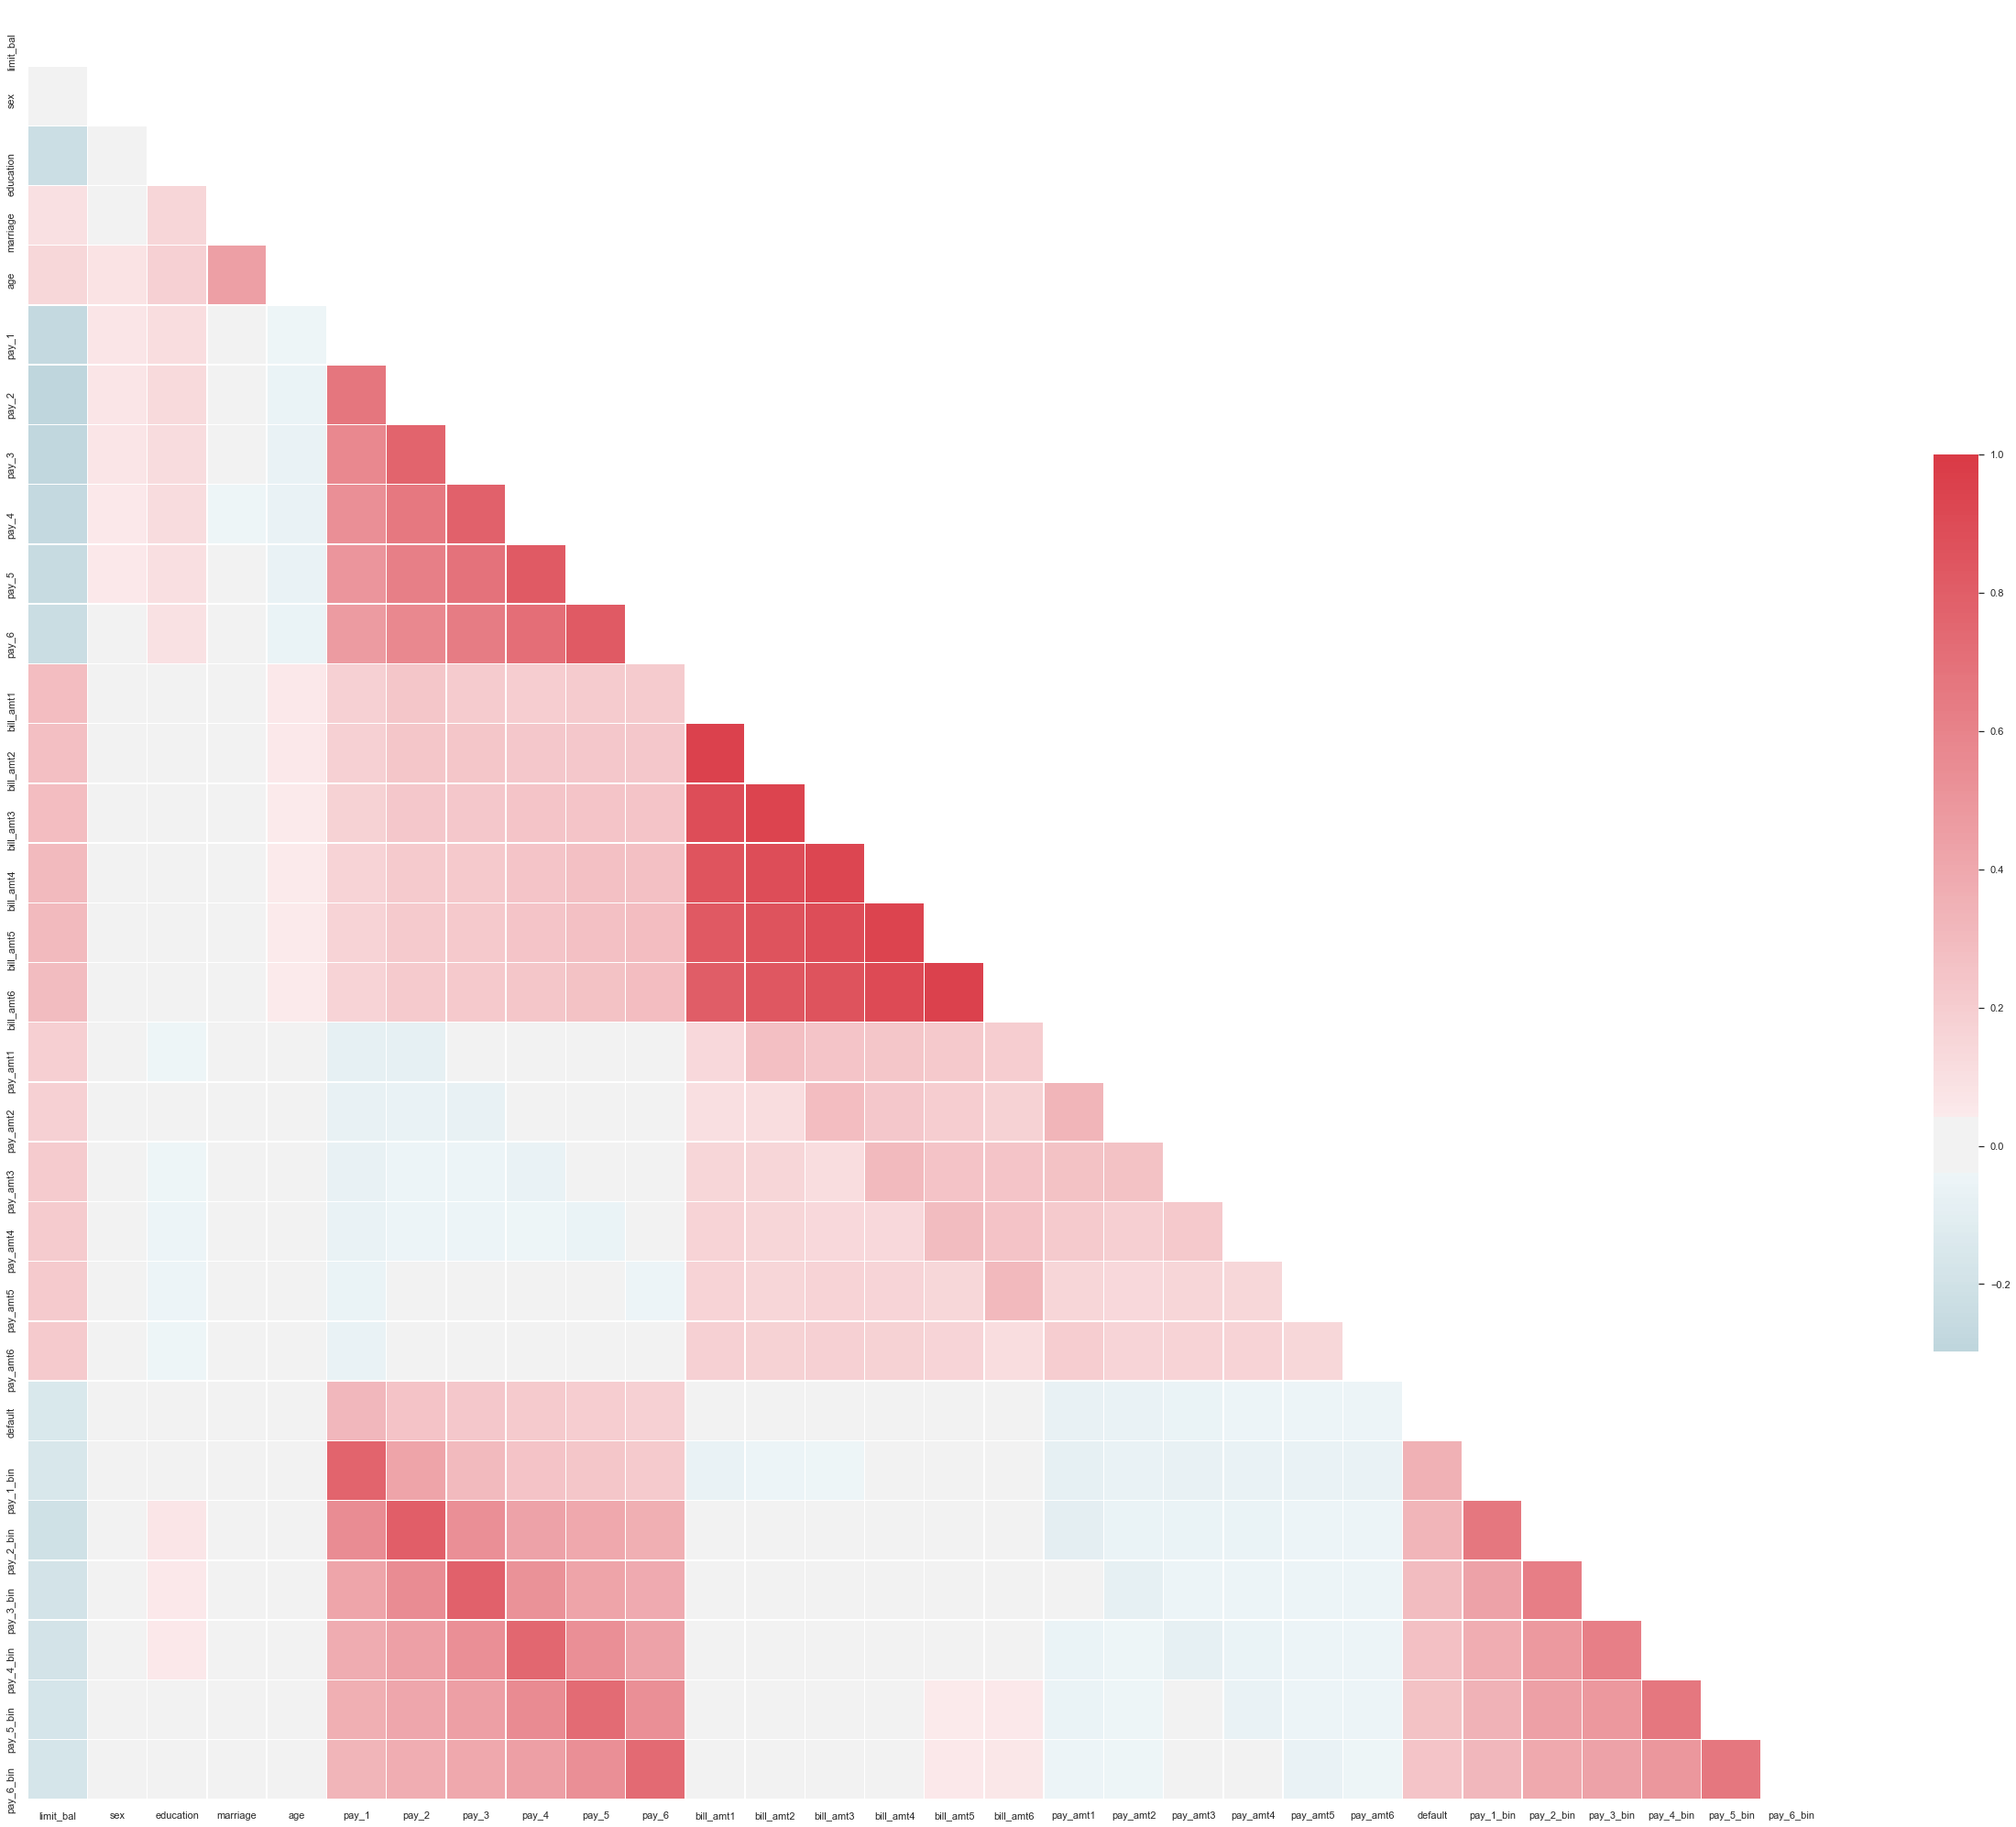

In [20]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(44, 36))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [21]:
to_drop = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
           'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']

df_train.drop(columns=to_drop, inplace=True)

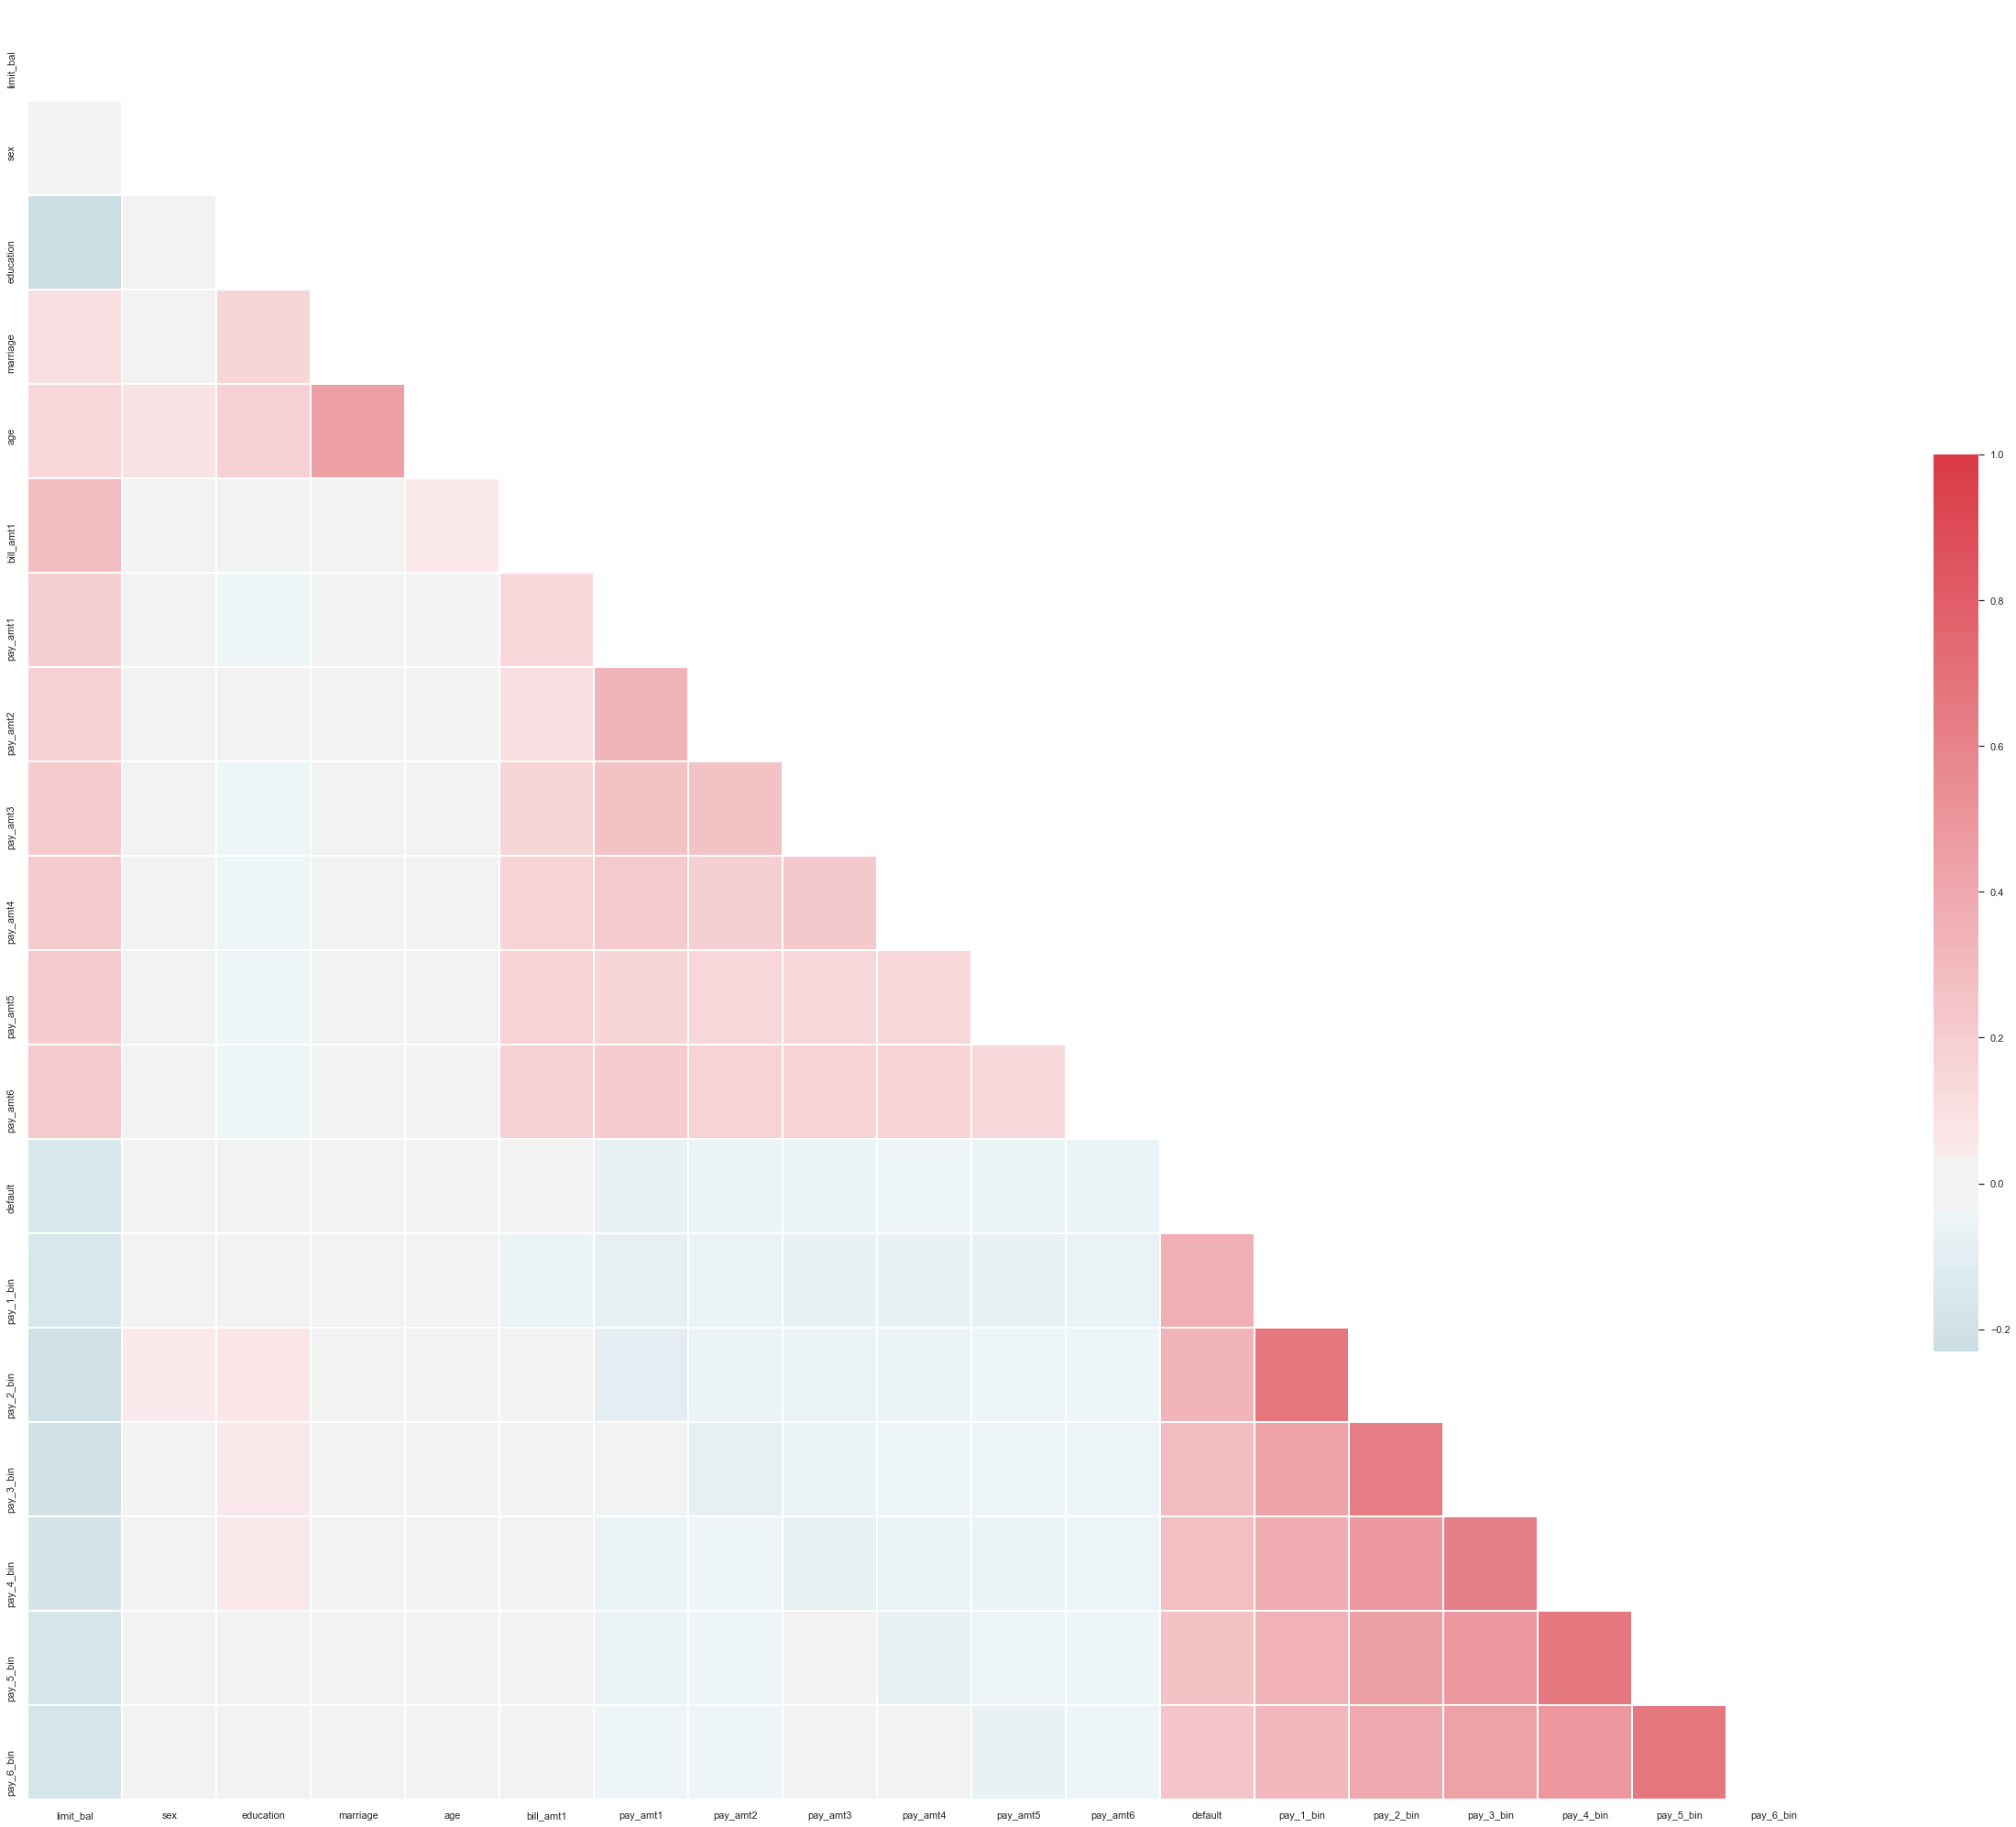

In [22]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(44, 36))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
df_train.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'bill_amt1',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default', 'pay_1_bin', 'pay_2_bin', 'pay_3_bin', 'pay_4_bin',
       'pay_5_bin', 'pay_6_bin'],
      dtype='object')

In [24]:
dummy_dataframe = pd.get_dummies(df_train['education'], prefix='education', drop_first=True, dtype=float)
dummy_dataframe.columns = [col.replace('.0', '') for col in dummy_dataframe.columns]
dummy_dataframe.columns

Index(['education_2', 'education_3', 'education_4'], dtype='object')

In [25]:
y = df_train['default']
X = pd.concat([df_train.drop(columns=['default', 'education'], axis=1), dummy_dataframe], axis=1)
X.head()

,limit_bal,sex,marriage,age,bill_amt1,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,pay_1_bin,pay_2_bin,pay_3_bin,pay_4_bin,pay_5_bin,pay_6_bin,education_2,education_3,education_4
0,200000.0,0.0,1.0,30.0,140327.0,6600.0,6000.0,5860.0,6000.0,5000.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1,200000.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,20000.0,0.0,0.0,28.0,2937.0,3353.0,3.0,5101.0,6.0,6530.0,8103.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,50000.0,1.0,0.0,23.0,51274.0,4175.0,41000.0,51705.0,700.0,718.0,700.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,20000.0,1.0,1.0,47.0,390.0,780.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly = polynomial_features_2.fit_transform(X)
poly_columns = polynomial_features_2.get_feature_names(X.columns)

X_poly = pd.DataFrame(X_poly, columns=poly_columns)
X_poly.head()

,limit_bal,sex,marriage,age,bill_amt1,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,...,pay_6_bin^2,pay_6_bin education_2,pay_6_bin education_3,pay_6_bin education_4,education_2^2,education_2 education_3,education_2 education_4,education_3^2,education_3 education_4,education_4^2
0,200000.0,0.0,1.0,30.0,140327.0,6600.0,6000.0,5860.0,6000.0,5000.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,200000.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,20000.0,0.0,0.0,28.0,2937.0,3353.0,3.0,5101.0,6.0,6530.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,50000.0,1.0,0.0,23.0,51274.0,4175.0,41000.0,51705.0,700.0,718.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,20000.0,1.0,1.0,47.0,390.0,780.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
X_poly_cols = [col.replace(' ', '_') for col in X_poly.columns]
X_poly.columns = X_poly_cols

In [28]:
len(X_poly_cols)

230

In [29]:
# Create correlation matrix
corr_matrix = X_poly.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,limit_bal,sex,marriage,age,bill_amt1,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,...,pay_6_bin^2,pay_6_bin_education_2,pay_6_bin_education_3,pay_6_bin_education_4,education_2^2,education_2_education_3,education_2_education_4,education_3^2,education_3_education_4,education_4^2
limit_bal,NaN,0.027786,0.102951,0.144338,0.283646,0.193930,0.185436,0.207461,0.204746,0.213842,...,0.171838,0.143751,0.096168,0.001312,0.141046,NaN,NaN,0.142350,NaN,0.013366
sex,NaN,NaN,0.032335,0.084107,0.036140,0.000013,0.005674,0.009696,0.002076,0.000857,...,0.023103,0.008784,0.013713,0.009606,0.023238,NaN,NaN,0.005972,NaN,0.005434
marriage,NaN,NaN,NaN,0.451852,0.019063,0.009963,0.007302,0.000064,0.010458,0.001284,...,0.009010,0.001003,0.043084,0.001153,0.060821,NaN,NaN,0.109615,NaN,0.014762
age,NaN,NaN,NaN,NaN,0.048985,0.025407,0.020186,0.025558,0.020936,0.022432,...,0.030822,0.053334,0.064181,0.001407,0.080737,NaN,NaN,0.234022,NaN,0.010004
bill_amt1,NaN,NaN,NaN,NaN,NaN,0.136506,0.107283,0.155979,0.164743,0.167295,...,0.010330,0.015571,0.014535,0.000217,0.037752,NaN,NaN,0.024450,NaN,0.030317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
education_2_education_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_2_education_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_3^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.055107
education_3_education_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
X_poly.drop(columns=to_drop, inplace=True)
X_poly.shape

(22500, 163)

In [31]:
# X_poly.dropna(axis=1, inplace=True)
# X_poly.shape

In [32]:
X_poly.head()

,limit_bal,sex,marriage,age,bill_amt1,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,...,pay_4_bin_education_4,pay_5_bin_education_2,pay_5_bin_education_3,pay_5_bin_education_4,pay_6_bin_education_2,pay_6_bin_education_3,pay_6_bin_education_4,education_2_education_3,education_2_education_4,education_3_education_4
0,200000.0,0.0,1.0,30.0,140327.0,6600.0,6000.0,5860.0,6000.0,5000.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,200000.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20000.0,0.0,0.0,28.0,2937.0,3353.0,3.0,5101.0,6.0,6530.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50000.0,1.0,0.0,23.0,51274.0,4175.0,41000.0,51705.0,700.0,718.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20000.0,1.0,1.0,47.0,390.0,780.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


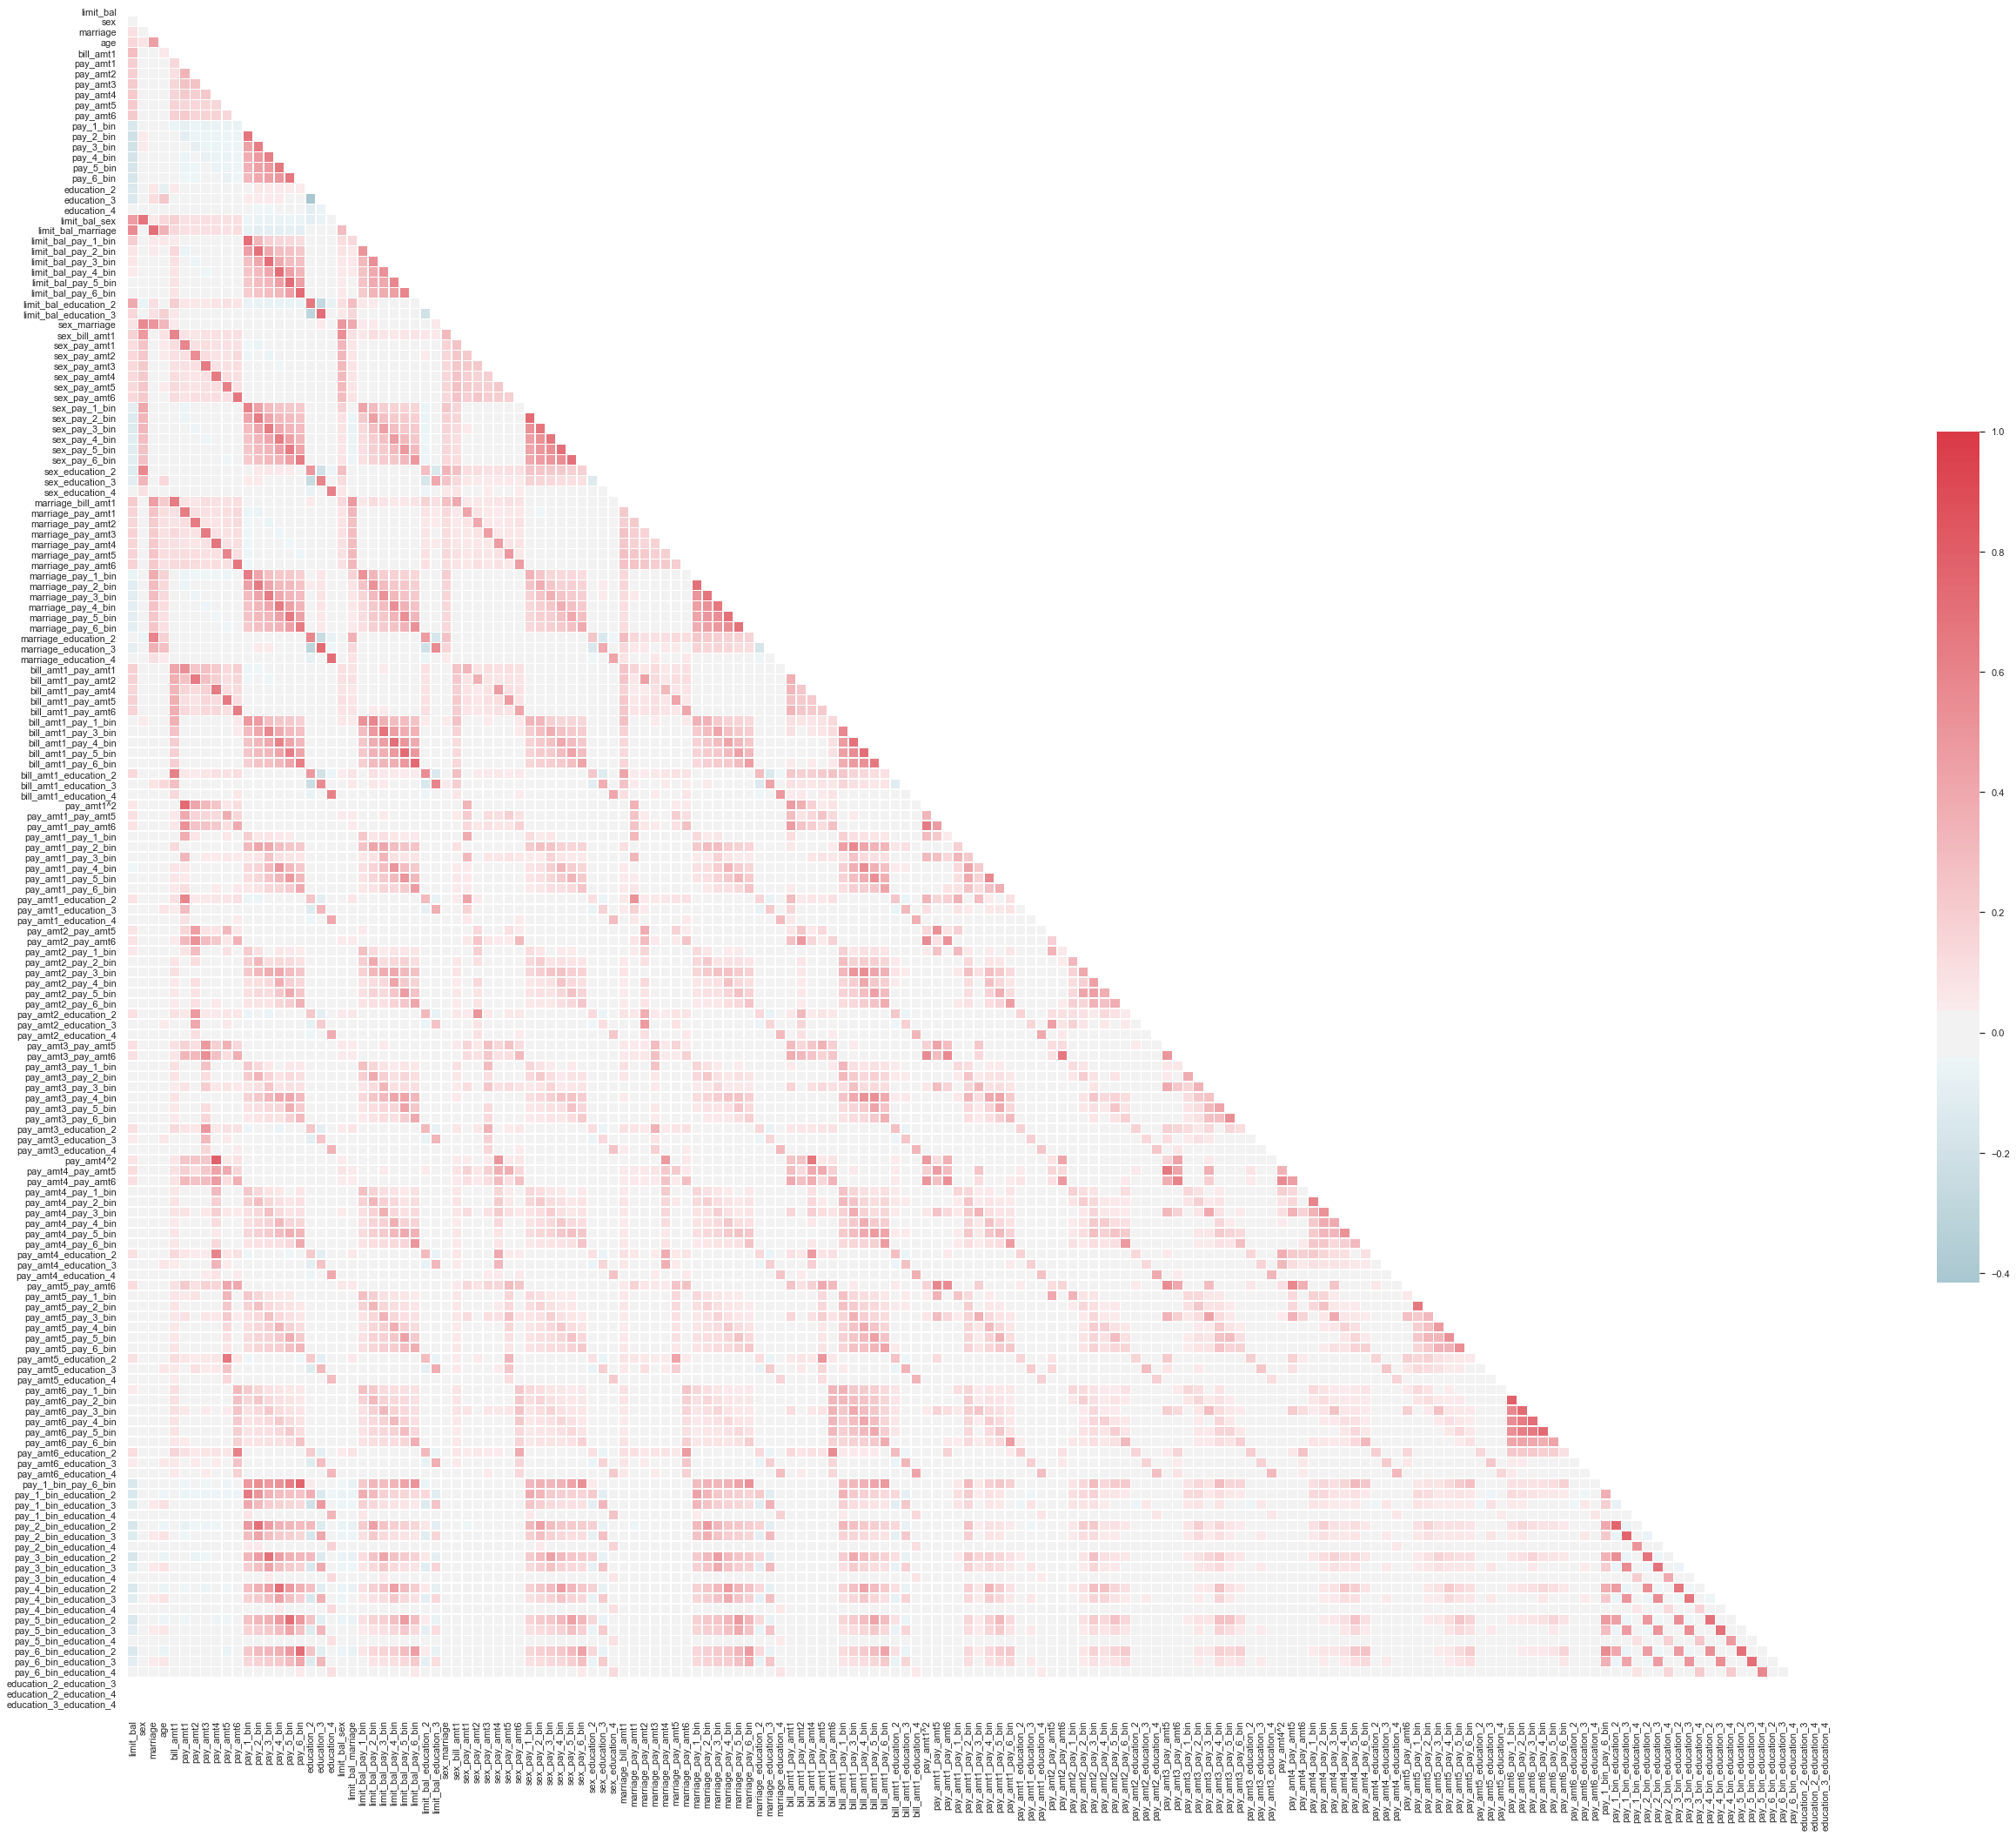

In [72]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_poly.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(44, 36))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats



X2 = sm.add_constant(X_poly)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     32.31
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        10:43:46   Log-Likelihood:                -9798.7
No. Observations:               22500   AIC:                         1.992e+04
Df Residuals:                   22339   BIC:                         2.121e+04
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [38]:
p = est2.pvalues
high_p = p[p > .1].keys()

X_poly_simplified = X_poly.drop(columns=high_p)
X_poly_simplified.drop(columns=['education_2_education_3', 'education_2_education_4', 'education_3_education_4'],
                      inplace=True)
X_poly_simplified.head()

,age,bill_amt1,pay_amt1,pay_amt2,pay_1_bin,pay_2_bin,pay_3_bin,pay_4_bin,pay_5_bin,education_2,...,pay_amt1^2,pay_amt1_education_4,pay_amt2_pay_1_bin,pay_amt2_pay_2_bin,pay_amt2_pay_3_bin,pay_amt6_pay_2_bin,pay_amt6_pay_5_bin,pay_1_bin_education_2,pay_1_bin_education_4,pay_2_bin_education_2
0,30.0,140327.0,6600.0,6000.0,1.0,1.0,1.0,1.0,1.0,0.0,...,43560000.0,0.0,6000.0,6000.0,6000.0,0.0,0.0,0.0,0.0,0.0
1,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28.0,2937.0,3353.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,...,11242609.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,23.0,51274.0,4175.0,41000.0,0.0,0.0,0.0,0.0,0.0,1.0,...,17430625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47.0,390.0,780.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,608400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
# import statsmodels.api as sm
# X_poly_con = sm.tools.add_constant(X_poly)
# logit_model = sm.Logit(y, X_poly_con)
# result = logit_model.fit(maxiter=1000, method='minimize')

In [84]:
# result.summary()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_poly_simplified, y, random_state=1)

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print(metrics.f1_score(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.precision_score(y_test, y_pred_class))
print(metrics.recall_score(y_test, y_pred_class))

0.4039408866995074
0.8064
0.6139767054908486
0.300978792822186


In [47]:
lr_coef_df = pd.DataFrame(data=logreg.coef_)
lr_coef_df.columns = X_poly_simplified.columns
lr_coef_df = lr_coef_df.T.sort_values(by=0).T
lr_coef_df.T

,0
pay_amt2,-0.494018
pay_amt1,-0.262958
limit_bal_education_2,-0.212458
bill_amt1,-0.197060
pay_2_bin_education_2,-0.123766
pay_amt2_pay_3_bin,-0.113616
pay_amt1_education_4,-0.104459
limit_bal_pay_1_bin,-0.085745
pay_amt6_pay_2_bin,-0.082293
pay_amt2_pay_2_bin,-0.041989


In [48]:
sorted_df = lr_coef_df.T
sorted_df.iloc[sorted_df[0].abs().argsort()][::-1].tail(20)

,0
bill_amt1_education_2,0.122078
pay_amt2_pay_3_bin,-0.113616
pay_amt1_education_4,-0.104459
sex_marriage,0.089713
pay_4_bin,0.087648
limit_bal_pay_1_bin,-0.085745
pay_amt6_pay_2_bin,-0.082293
bill_amt1_pay_amt1,0.073803
limit_bal_pay_4_bin,0.068178
age,0.045955


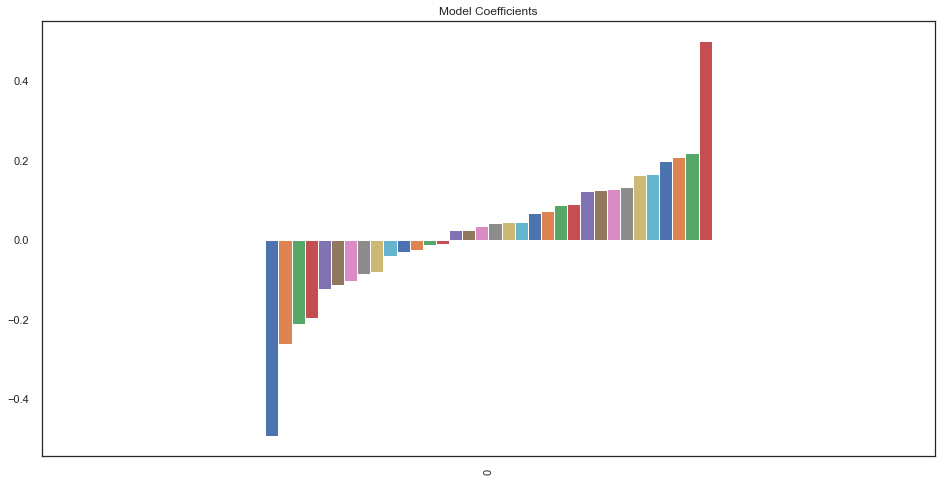

In [49]:
lr_coefs = sum(sorted_df[0].abs())
lr_coef_df.plot(kind='bar', title='Model Coefficients', legend=False, figsize=(16,8))

In [51]:
lr_clf_weighted = LogisticRegression(solver='liblinear', class_weight='balanced')

lr_clf_weighted.fit(X_train, y_train)

y_pred_weighted = lr_clf_weighted.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_weighted))
print('Test Precision score: ', metrics.precision_score(y_test, y_pred_weighted))
print('Test Recall score: ', metrics.recall_score(y_test, y_pred_weighted))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_weighted))

Test Accuracy score:  0.7649777777777778
Test Precision score:  0.4679144385026738
Test Recall score:  0.5709624796084829
Test F1 score:  0.5143277002204262


In [52]:
print(metrics.confusion_matrix(y_test, y_pred_weighted))

[[3603  796]
 [ 526  700]]


In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_weighted)
classes = ['No Default', 'Defaulted']

In [54]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[3603  796]
 [ 526  700]]


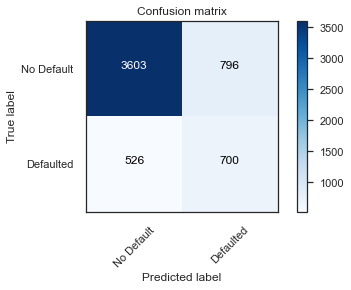

In [55]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [57]:
lr_clf_coef_df = pd.DataFrame(data=lr_clf_weighted.coef_)
lr_clf_coef_df.columns = X_poly_simplified.columns
lr_clf_coef_df = lr_clf_coef_df.T.sort_values(by=0).T
lr_clf_coef_df.T

,0
pay_amt2,-0.453635
pay_amt1,-0.281964
limit_bal_education_2,-0.213646
bill_amt1,-0.178060
pay_2_bin_education_2,-0.115256
pay_amt1_education_4,-0.103438
pay_amt2_pay_3_bin,-0.100176
pay_amt6_pay_2_bin,-0.089754
limit_bal_pay_1_bin,-0.071549
pay_amt2_pay_2_bin,-0.036961


In [59]:
sorted_df2 = lr_clf_coef_df.T
sorted_df2.iloc[sorted_df2[0].abs().argsort()][::-1].tail(20)

,0
bill_amt1_education_2,0.109456
pay_4_bin,0.105634
pay_amt1_education_4,-0.103438
pay_amt2_pay_3_bin,-0.100176
bill_amt1_pay_amt1,0.096124
pay_amt6_pay_2_bin,-0.089754
sex_marriage,0.084543
limit_bal_pay_1_bin,-0.071549
limit_bal_pay_4_bin,0.050247
age,0.045112


In [60]:
list(sorted_df2[sorted_df2[0].abs() < .01].index)

['sex_pay_2_bin']

In [143]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# neighbors = list(range(1,16,2))
# algos = ['ball_tree', 'kd_tree', 'brute']
# p = list(range(1,6))
# weight = ['uniform', 'distance']
# params = {'n_neighbors': neighbors, 'algorithm': algos, 'p': p, 'weights': weight}
# grid_k = GridSearchCV(KNeighborsClassifier(), params, scoring='f1', verbose=1, n_jobs=-1, cv=7)
# grid_k.fit(X_train, y_train)

In [144]:
# # examine the best model
# print(grid_k.best_score_)
# print(grid_k.best_params_)
# print(grid_k.best_estimator_)

In [61]:
param_grid = { 
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [.0001, .001, .01, .1, 1, 10, 100],
    'solver': ['sag', 'saga', 'liblinear'],
#     'class_weight': [{1:}]
}

In [62]:
#create a grid search object and fit it to the data

CV_rfc = GridSearchCV(LogisticRegression(class_weight='balanced'),
                      param_grid, n_jobs=-1, scoring='f1', verbose=1)
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:   15.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'saga', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [63]:
### Identify the best params 
print(CV_rfc.best_estimator_)


#Identify the best score during fitting with cross-validation
print(CV_rfc.best_score_)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
0.5235453022827808


In [64]:
#predict on the test set

rfc_pred = CV_rfc.best_estimator_.predict(X_test)

# checking metrics
print('Test Accuracy score: ', metrics.accuracy_score(y_test, rfc_pred))
print('Test Precision score: ', metrics.precision_score(y_test, rfc_pred))
print('Test Recall score: ', metrics.recall_score(y_test, rfc_pred))
print('Test F1 score: ', metrics.f1_score(y_test, rfc_pred))

Test Accuracy score:  0.768
Test Precision score:  0.4734721289456011
Test Recall score:  0.5750407830342578
Test F1 score:  0.5193370165745856


In [162]:
print(metrics.confusion_matrix(y_test, rfc_pred))

[[3620  779]
 [ 525  701]]


In [ ]:
results = {}

results['imbalanced'] = (accuracy_score(y_test, y_pred_test), f1_score(y_test, y_pred_test))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1315f1198>]],
      dtype=object)

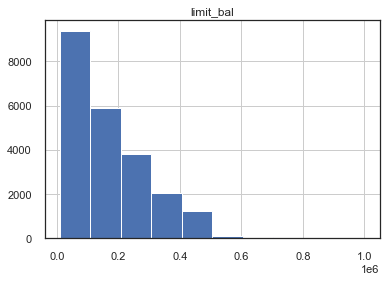

In [86]:
df_train.hist('limit_bal')

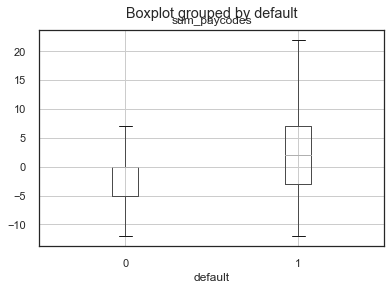

In [118]:
df_train.boxplot('sum_paycodes', 'default', showfliers=False)

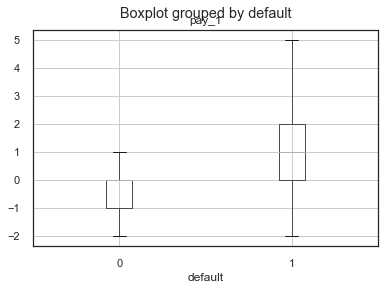

In [119]:
df_train.boxplot('pay_1', 'default', showfliers=False)

In [120]:
conditions = [df_train.pay_1 <= 0, df_train.pay_1 > 0]
choices = [0, 1]

print(df_train.pay_1.value_counts())
df_train['pay1_simplified'] = np.select(conditions, choices, df_train.pay_1)
print(df_train.pay1_simplified.value_counts())

 0    11071
-1     4283
 1     2759
-2     2036
 2     1999
 3      251
 4       56
 5       17
 8       13
 6       10
 7        5
Name: pay_1, dtype: int64
0    17390
1     5110
Name: pay1_simplified, dtype: int64


In [127]:
df_train.groupby('default').pay1_simplified.value_counts(normalize=True)

default  pay1_simplified
0        0                  0.853564
         1                  0.146436
1        1                  0.511151
         0                  0.488849
Name: pay1_simplified, dtype: float64

In [128]:
conditions = [df_train.pay_2 <= 0, df_train.pay_2 > 0]
choices = [0, 1]

print(df_train.pay_2.value_counts())
df_train['pay2_simplified'] = np.select(conditions, choices, df_train.pay_2)
print(df_train.pay2_simplified.value_counts())

 0    11801
-1     4587
 2     2946
-2     2798
 3      239
 4       73
 5       19
 1       18
 7       13
 6        6
Name: pay_2, dtype: int64
0    19186
1     3314
Name: pay2_simplified, dtype: int64


In [129]:
df_train.groupby('default').pay2_simplified.value_counts(normalize=True)

default  pay2_simplified
0        0                  0.915311
         1                  0.084689
1        0                  0.632309
         1                  0.367691
Name: pay2_simplified, dtype: float64

In [121]:
df_train.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,less_due,sum_paycodes,pay1_simplified
0,200000,0,3,1,30,2,2,2,2,2,...,6600,6000,5860,6000,5000,0,0,1,12,1
1,200000,0,4,0,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,-12,0
2,20000,0,2,0,28,0,0,2,0,0,...,3353,3,5101,6,6530,8103,1,1,2,0
3,50000,1,2,0,23,0,0,0,-1,0,...,4175,41000,51705,700,718,700,0,0,-1,0
4,20000,1,2,1,47,-1,-1,-1,-2,-2,...,780,0,0,0,0,0,0,0,-9,0


In [122]:
df_train.groupby('default').sum_paycodes.describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,17523.0,-1.964732,5.005602,-12.0,-5.0,0.0,0.0,33.0
1,4977.0,1.971067,7.455870,-12.0,-3.0,2.0,7.0,36.0


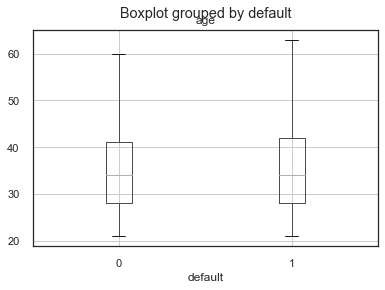

In [123]:
df_train.boxplot('age', 'default', showfliers=False)

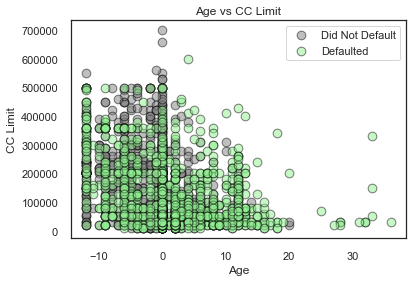

In [124]:
plt.scatter(x = df_train[df_train['default']==0].sum_paycodes.head(1000), y = df_train[df_train['default']==0].limit_bal.head(1000),
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Default')
plt.scatter(x = df_train[df_train['default']==1].sum_paycodes.head(1000), y = df_train[df_train['default']==1].limit_bal.head(1000),
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Defaulted')
plt.xlabel('Age')
plt.ylabel('CC Limit')
plt.title('Age vs CC Limit')
plt.legend()

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130a61cc0>]],
      dtype=object)

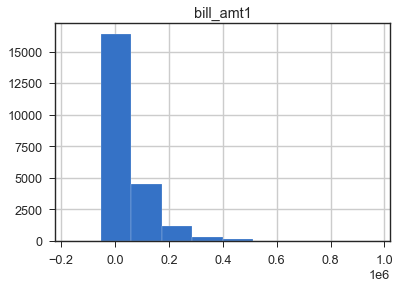

In [20]:
df_train.hist('bill_amt1')

* drop pay_amt6
* drop bill_amt2, drop bill_amt4, drop bill_amt6

In [ ]:
df_train['']

In [43]:
df_train.iloc[:,5:].head(20)

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt3,bill_amt5,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,default,balance_1,balance_3,balance_5,sum_paycodes
0,2,2,2,2,2,2,140327,145374,149244,6600,6000,5860,6000,5000,0,146973,141413,136537,12
1,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,-12
2,0,0,2,0,0,0,2937,4144,6894,3353,3,5101,6,6530,1,4894,3067,2343,2
3,0,0,0,-1,0,0,51274,49724,18712,4175,41000,51705,700,718,0,18411,-3268,46299,-1
4,-1,-1,-1,-2,-2,-2,390,0,0,780,0,0,0,0,0,0,0,0,-9
5,0,0,0,0,0,0,6902,7566,7722,1216,1213,363,219,234,0,7656,7353,6688,0
6,0,-1,0,0,0,0,9232,66087,48862,68209,2081,2000,2000,1828,0,48022,48716,0,-1
7,0,0,0,0,0,-1,157174,192575,135838,9900,83200,0,3006,132854,0,-7371,157028,129201,-1
8,0,0,2,2,2,0,18743,18872,20329,3000,0,3000,0,1000,0,19853,18178,16879,6
9,1,2,0,0,2,0,104492,52817,56556,5200,3000,8500,0,4000,0,51220,49454,48148,5


In [31]:
df_train.iloc[:,5:].corr()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
PAY_0,1.000000,0.672889,0.571926,0.534752,0.504522,0.470038,0.184428,0.178688,0.172755,0.174226,0.173086,-0.076906,-0.069162,-0.069399,-0.061511,-0.056878,-0.059417,0.318692
PAY_2,0.672889,1.000000,0.764935,0.658755,0.619906,0.575016,0.235139,0.225971,0.219493,0.218316,0.218299,-0.078097,-0.059546,-0.052031,-0.044863,-0.033839,-0.037124,0.256988
PAY_3,0.571926,0.764935,1.000000,0.777617,0.688033,0.634874,0.208265,0.228859,0.224607,0.222040,0.220554,0.004385,-0.070834,-0.048903,-0.043839,-0.033716,-0.036079,0.232215
PAY_4,0.534752,0.658755,0.777617,1.000000,0.821642,0.715512,0.203331,0.247847,0.243663,0.240505,0.236820,-0.008223,0.000764,-0.065864,-0.040889,-0.031430,-0.026479,0.216179
PAY_5,0.504522,0.619906,0.688033,0.821642,1.000000,0.817673,0.205301,0.246190,0.270240,0.267731,0.261525,-0.004751,0.000999,0.009714,-0.055811,-0.029758,-0.023265,0.200774
PAY_6,0.470038,0.575016,0.634874,0.715512,0.817673,1.000000,0.206416,0.244285,0.265469,0.290260,0.284968,0.000548,-0.002549,0.008029,0.022599,-0.044229,-0.024881,0.186802
BILL_AMT1,0.184428,0.235139,0.208265,0.203331,0.205301,0.206416,1.000000,0.896150,0.857784,0.828507,0.804999,0.136506,0.107283,0.155979,0.164743,0.167295,0.182727,-0.021522
BILL_AMT3,0.178688,0.225971,0.228859,0.247847,0.246190,0.244285,0.896150,1.000000,0.931050,0.892082,0.861155,0.249550,0.285811,0.118394,0.143701,0.167073,0.182110,-0.015825
BILL_AMT4,0.172755,0.219493,0.224607,0.243663,0.270240,0.265469,0.857784,0.931050,1.000000,0.941926,0.906645,0.237069,0.225549,0.303130,0.134379,0.163703,0.177918,-0.010929
BILL_AMT5,0.174226,0.218316,0.222040,0.240505,0.267731,0.290260,0.828507,0.892082,0.941926,1.000000,0.950881,0.221649,0.196868,0.259311,0.294260,0.145210,0.159881,-0.008143


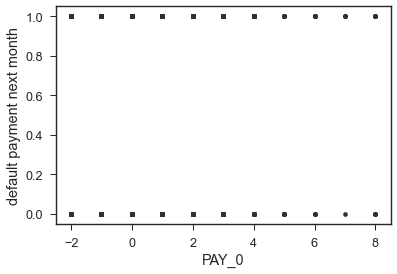

In [28]:
df_train.plot.scatter('PAY_0', 'default payment next month')

In [58]:
cols =[]
for i in df_train:
    cols.append(i)

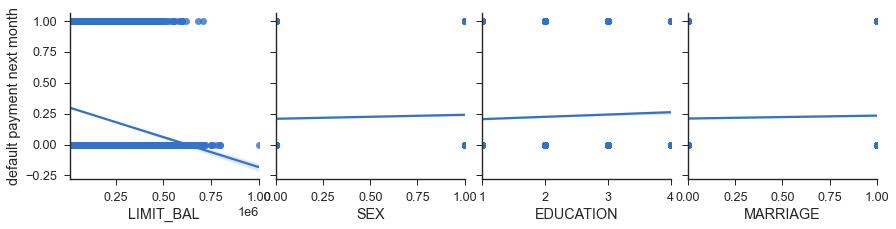

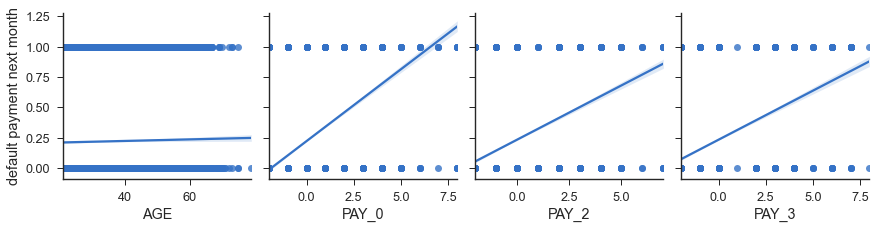

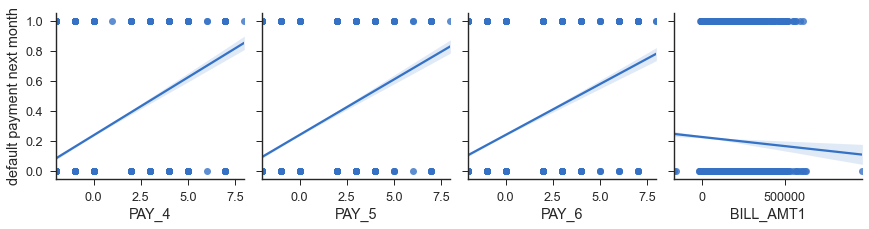

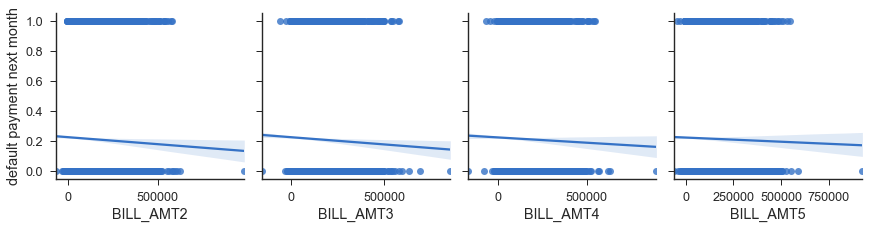

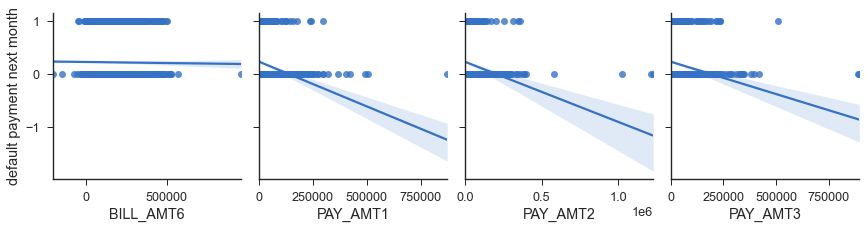

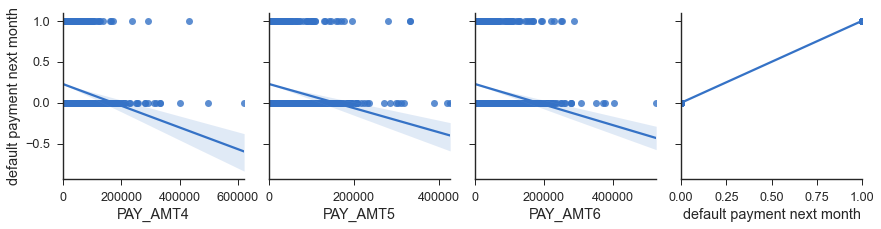

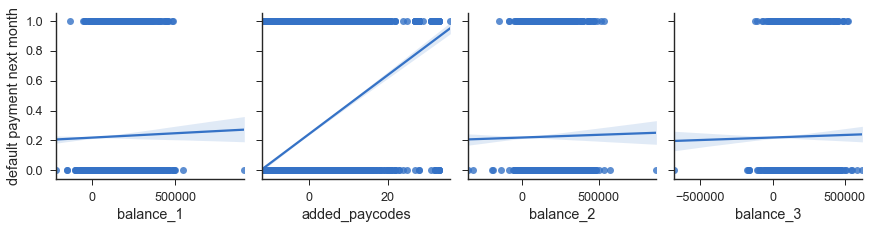

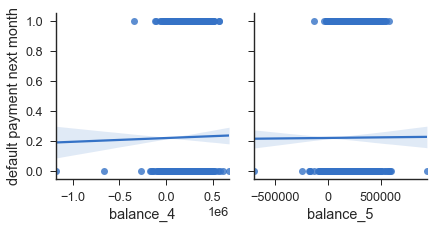

In [57]:
n = 4
row_groups= [cols[i:i+n] for i in range(0, len(cols), n) ]
for i in row_groups:
    pp = sns.pairplot(data=df_train, y_vars=['default payment next month'],x_vars=i, kind='reg', height=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x166d8c7b8>]],
      dtype=object)

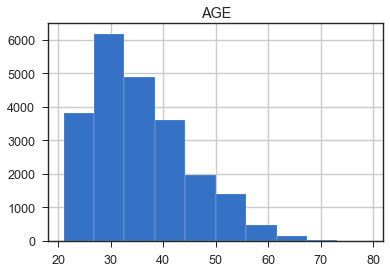

In [68]:
df_train.hist('AGE')

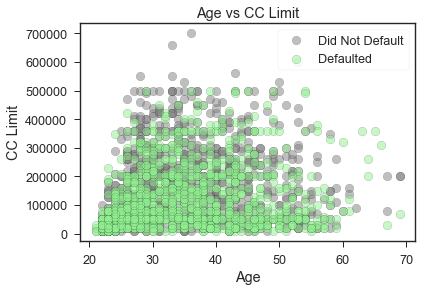

In [86]:
plt.scatter(x = df_train[df_train['default']==0].age.head(1000), y = df_train[df_train['default']==0].limit_bal.head(1000),
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Default')
plt.scatter(x = df_train[df_train['default']==1].age.head(1000), y = df_train[df_train['default']==1].limit_bal.head(1000),
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Defaulted')
plt.xlabel('Age')
plt.ylabel('CC Limit')
plt.title('Age vs CC Limit')
plt.legend()

plt.show()

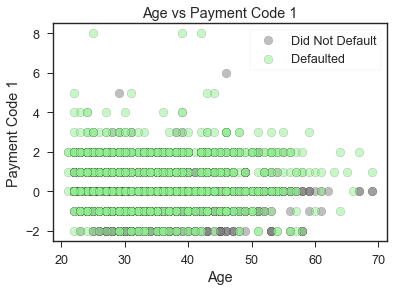

In [88]:
plt.scatter(x = df_train[df_train['default']==0].age.head(1000), y = df_train[df_train['default']==0].pay_1.head(1000),
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Default')
plt.scatter(x = df_train[df_train['default']==1].age.head(1000), y = df_train[df_train['default']==1].pay_1.head(1000),
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Defaulted')
plt.xlabel('Age')
plt.ylabel('Payment Code 1')
plt.title('Age vs Payment Code 1')
plt.legend()

plt.show()

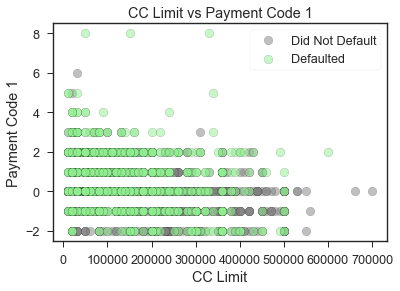

In [89]:
plt.scatter(x = df_train[df_train['default']==0].limit_bal.head(1000), y = df_train[df_train['default']==0].pay_1.head(1000),
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Default')
plt.scatter(x = df_train[df_train['default']==1].limit_bal.head(1000), y = df_train[df_train['default']==1].pay_1.head(1000),
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Defaulted')
plt.xlabel('CC Limit')
plt.ylabel('Payment Code 1')
plt.title('CC Limit vs Payment Code 1')
plt.legend()

plt.show()

In [90]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features_2 = PolynomialFeatures(degree=2, include_bias=False)
features_poly = polynomial_features_2.fit_transform(df_train)
poly_columns = polynomial_features_2.get_feature_names(df_train.columns)

features_poly = pd.DataFrame(features_poly, columns=poly_columns)
features_poly.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,balance_2^2,balance_2 balance_3,balance_2 balance_4,balance_2 balance_5,balance_3^2,balance_3 balance_4,balance_3 balance_5,balance_4^2,balance_4 balance_5,balance_5^2
0,200000.0,0.0,3.0,1.0,30.0,2.0,2.0,2.0,2.0,2.0,...,2.051884e+10,2.025656e+10,1.996449e+10,1.955811e+10,1.999764e+10,1.970930e+10,1.930811e+10,1.942511e+10,1.902971e+10,1.864235e+10
1,200000.0,0.0,4.0,0.0,27.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,20000.0,0.0,2.0,0.0,28.0,0.0,0.0,2.0,0.0,0.0,...,4.744454e+07,2.112550e+07,2.852321e+07,1.613858e+07,9.406489e+06,1.270045e+07,7.185981e+06,1.714788e+07,9.702363e+06,5.489649e+06
3,50000.0,1.0,2.0,0.0,23.0,0.0,0.0,0.0,-1.0,0.0,...,3.244321e+08,-5.886322e+07,1.571367e+08,8.339376e+08,1.067982e+07,-2.851003e+07,-1.513051e+08,7.610818e+07,4.039125e+08,2.143597e+09
4,20000.0,1.0,2.0,1.0,47.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [91]:
features_poly.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5',
       ...
       'balance_2^2', 'balance_2 balance_3', 'balance_2 balance_4',
       'balance_2 balance_5', 'balance_3^2', 'balance_3 balance_4',
       'balance_3 balance_5', 'balance_4^2', 'balance_4 balance_5',
       'balance_5^2'],
      dtype='object', length=495)